# Generate Occupancy Grid
Generating occupancy grid using DL models and transformations. 

In [1]:
import numpy as np
import sys
import cv2
sys.path.insert(1, './models/PSMNet')
from generate_disparity import generate_disparity 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

load PSMNet
Number of model parameters: 5224768


## Including the Detectron 2

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import ColorMode
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)

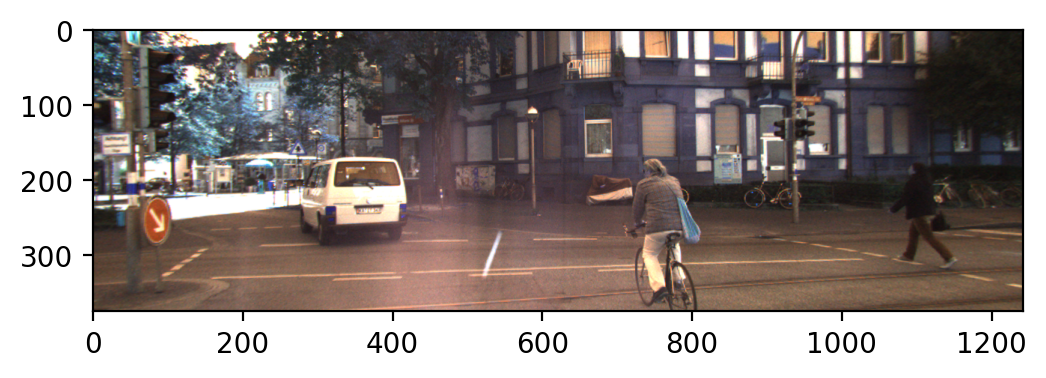

In [3]:
left = cv2.imread('./inputs/left.png')
right = cv2.imread('./inputs/right.png')
plt.imshow(right)

/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for detail

time = 0.44


True

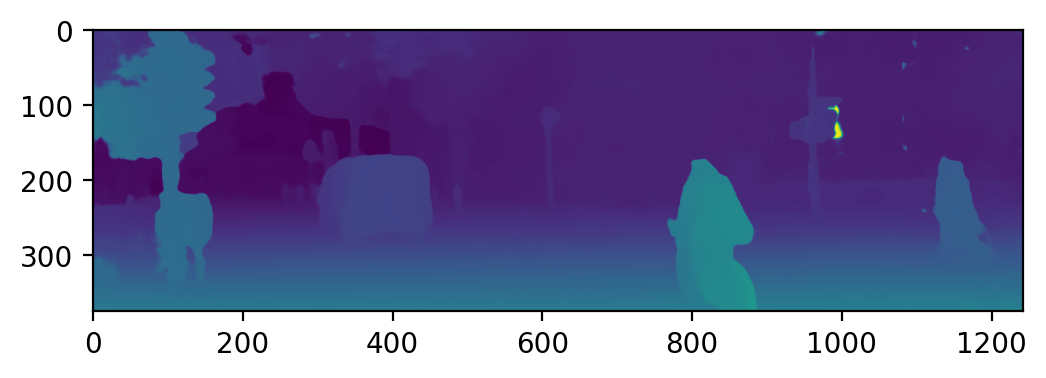

In [4]:

img = generate_disparity('inputs/left.png', 'inputs/right.png', False)
plt.imshow(img)
cv2.imwrite('disparity.png', img)

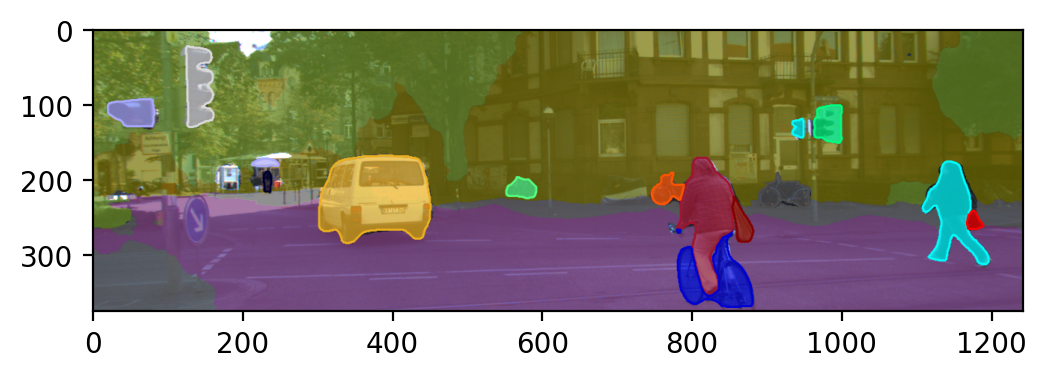

In [6]:
im = cv2.imread('./inputs/left.png')
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]

x =  MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
for y in range(len(x.thing_classes)) :
    x.thing_classes[y] = ''
    
# Changed function Visualizer.draw_instance_predictions



v = Visualizer(im[:, :, ::-1], x, scale=1.0)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info, want_labels = False, want_scores = False)
cv2.imwrite('outputs/instance_segmentation/IS_left.jpg',v.get_image()[:, :, ::-1])
plt.imshow(v.get_image())